In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
df = pd.read_csv('/Users/luryan/Documents/persona_project/spaceship-titanic/data/train.csv')

In [21]:
df['Homeplanet_Mars'] = df['HomePlanet'].apply(lambda x: 1 if x == 'Mars' else 0)
df['Homeplanet_Earth'] = df['HomePlanet'].apply(lambda x: 1 if x == 'Earth' else 0)
df['Homeplanet_Europa'] = df['HomePlanet'].apply(lambda x: 1 if x == 'Europa' else 0)

# Verifique se a coluna 'HomePlanet' existe no DataFrame
if 'HomePlanet' in df.columns:
    # Exclua a coluna original 'HomePlanet'
    df = df.drop('HomePlanet', axis=1)

df['Cabin_S'] = df['Cabin'].apply(lambda x: 1 if str(x).split('/')[-1] == 'S' else 0)
df['Cabin_P'] = df['Cabin'].apply(lambda x: 1 if str(x).split('/')[-1] == 'P' else 0)
# df['Cabin'].fillna(df['Cabin_S', 'Cabin_P'].dropna().mean(), inplace=True)

# Verifique se a coluna original 'Cabin' existe no DataFrame
if 'Cabin' in df.columns:
    # Exclua a coluna original 'Cabin'
    df = df.drop('Cabin', axis=1)
    
# Remover as colunas selecionadas
drop = ['PassengerId', 'Destination', 'Name']
df = df.drop(drop, axis=1)

df = df.fillna(df.mean())

coluna_alvo = 'Transported'

X = df.drop(coluna_alvo, axis=1)
y = df[coluna_alvo]

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

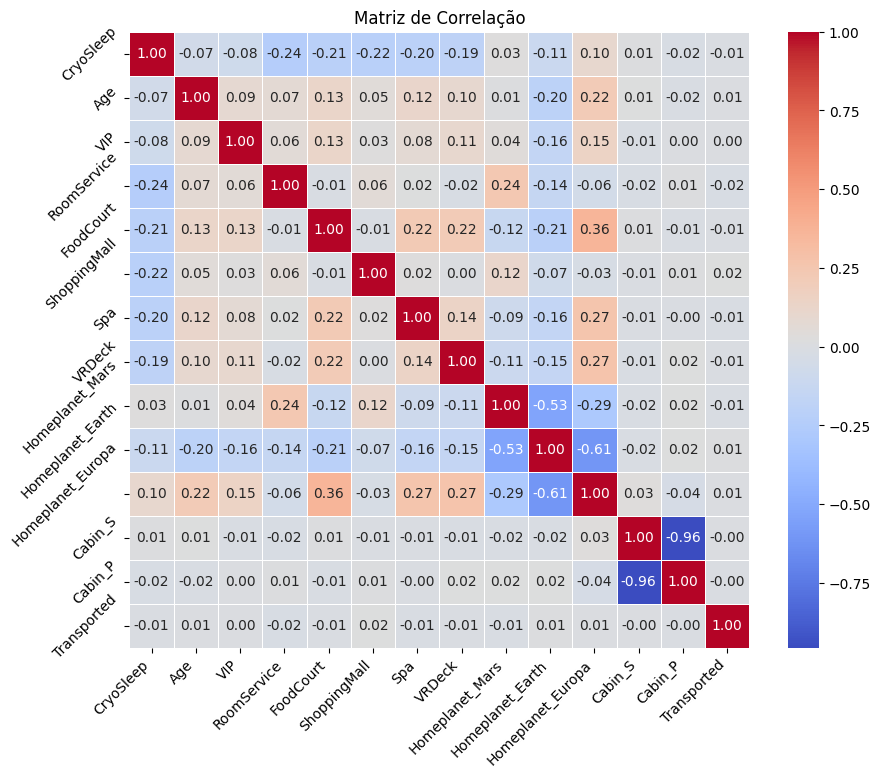

In [22]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
y_train_df = pd.DataFrame(y_train, columns=[coluna_alvo])

# Concatenar para matriz de correlação
combined_data = pd.concat([X_train_df, y_train_df], axis=1)
correlation_matrix = combined_data.corr()

# Ajuste do tamanho da figura para melhor visualização
plt.figure(figsize=(10, 8))

# Utilize o método heatmap de seaborn para plotar a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Ajustar a posição dos rótulos para evitar cortes
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')

# Adicionar título ao gráfico
plt.title('Matriz de Correlação')
correlation_values = correlation_matrix.to_numpy()

row_labels = correlation_matrix.index.values
col_labels = correlation_matrix.columns.values
# Exibir o gráfico
# plt.show()
np.savetxt("matriz_correlacao.txt", correlation_values, fmt='%.2f', delimiter='\t', header="\t".join(correlation_matrix.columns), comments='')
